Quantum Teleportation using Qiskit
Nadeen Adel Mohamed Menacy - A9ATIE 


In [9]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


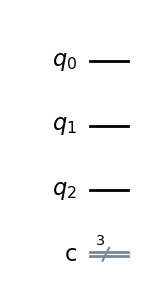

In [10]:
# Create a circuit with 3 qubits and 3 classical bits
# q0: state to teleport
# q1: Alice's qubit
# q2: Bob's qubit
qc = QuantumCircuit(3, 3)
qc.draw("mpl")


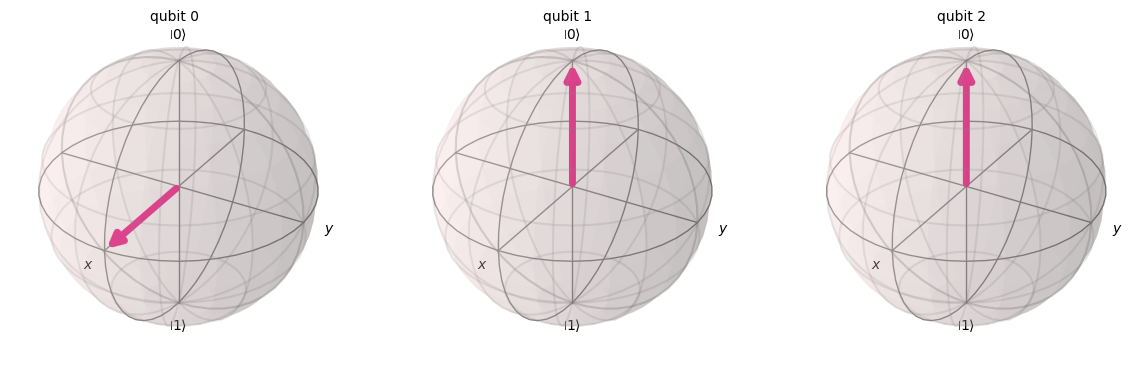

In [11]:
# Step 1: Prepare qubit 0 (the one we want to teleport)
qc.h(0)  # Create a superposition state |ψ⟩ = (|0⟩ + |1⟩)/√2

# Visualize the current state of the system
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)


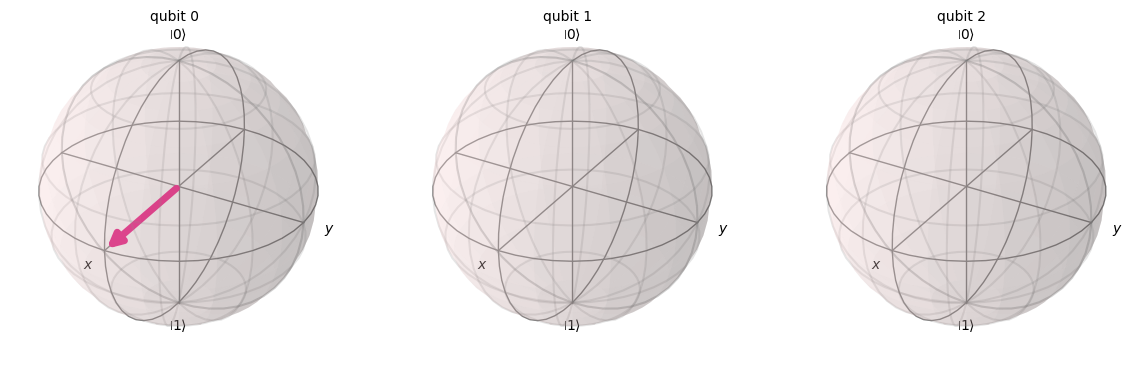

In [12]:
# Step 2: Create an entangled pair between qubit 1 (Alice) and qubit 2 (Bob)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Visualize the entangled state
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)


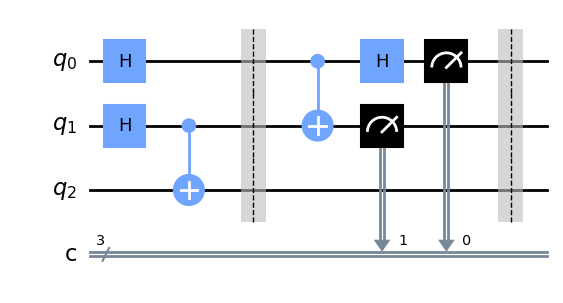

In [13]:
# Step 3: Alice performs Bell measurement on her two qubits (0 and 1)
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])
qc.barrier()

qc.draw("mpl")


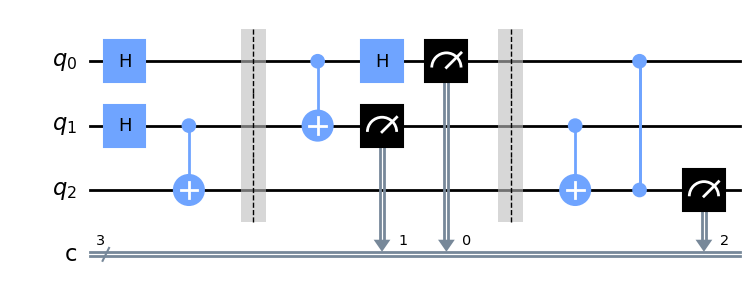

In [14]:
# Step 4: Bob applies X and Z corrections based on Alice’s classical results
qc.cx(1, 2)
qc.cz(0, 2)

# Step 5: Measure Bob’s qubit to verify teleportation
qc.measure(2, 2)

qc.draw("mpl")


In [15]:
backend = Aer.get_backend("qasm_simulator")
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)
plt.show()
